# Overview

This a notebook that inspects the results of a WarpX simulation.

# Instruction

Enter the path of the data you wish to visualize below. Then execute the cells one by one, by selecting them with your mouse and typing `Shift + Enter`

In [1]:
# Import statements
import yt ; yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
%matplotlib notebook

## Read data in the simulation frame

/Users/mthevenet/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1394: RuntimeWarning: invalid value encountered in true_divide
  out=out, **kwargs)



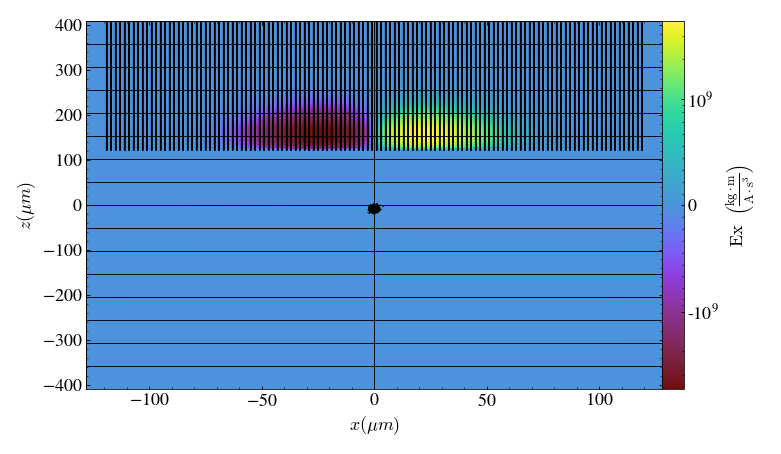

In [4]:
ds = yt.load( './diags/plotfiles/plt00200' ) # Create a dataset object
sl = yt.SlicePlot(ds, 2, 'Ex', aspect=.2) # Create a sliceplot object
sl.set_xlabel(r'$x (\mu m)$') # Set labels x
sl.set_ylabel(r'$z (\mu m)$') # Set labels y
sl.annotate_particles(width=(10.e-6, 'm'), p_size=2, ptype='ions', col='black') # Plot particles species=ions
sl.annotate_particles(width=(10.e-6, 'm'), p_size=2, ptype='electrons', col='black')
sl.annotate_particles(width=(10.e-6, 'm'), p_size=2, ptype='beam', col='black')
sl.annotate_grids() # Show grids
sl.show() # Show the plot

#############################
### OTHER USEFUL COMMANDS ###
#############################
# # List all fields in the datasert
# ds.field_list
# # Get All Data from the dataset
# # Then get some data. ".v" converts arrays from units-aware yt arrays to numpy arrays.
# ad = ds.all_data()
# Bx = ad['boxlib', 'Bx'].v
# # Get All Data from the dataset, on a given level and given dimension.
# # Then get some data. ".v" converts arrays from units-aware yt arrays to numpy arrays.
# # This is similar to the 2 lines above, except that F has the proper shape.
# all_data_level_0 = ds.covering_grid(level=0,left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
# Bx = all_data_level_0['boxlib', 'Bx'].v.squeeze()
# # particle 
# # CAREFUL! For the moment, 2d WarpX simulations use (x, z) spatial coordinate 
# # but they are stored as  (particle_position_x, particle_position_y) in Yt
# x = ad['beam', 'particle_position_x'].v
# z = ad['beam', 'particle_position_y'].v
# # For 2d simulations, WarpX and Yt use (ux, uz)
# # ux/c should be the nirmalized momentum
# ux = ad['beam', 'particle_momentum_x'].v
# uy = ad['beam', 'particle_momentum_y'].v
# uz = ad['beam', 'particle_momentum_z']
# w = ad['beam', 'particle_weight'].v
# # Set figure size
# sl.figure_size = (9, 7)
# # Save image
# sl.save('./toto.pdf')
# # This returns the domain boundaries
# sl.bounds

## Read data back-transformed to the lab frame when the simulation runs in the boosted frame (example: 2D run)

In [8]:
# read_raw_data.py is located in warpx/Tools.
import os, glob
import read_raw_data

In [9]:
# For the moment, the back-transformed diagnostics must be read with 
# custom functions like this one.
# It should be OpenPMD-compliant hdf5 files soon, making this part outdated.
def get_particle_field(snapshot, species, field):
    fn = snapshot + '/' + species
    files = glob.glob(os.path.join(fn, field + '_*'))
    files.sort()
    all_data = np.array([])
    for f in files:
        data = np.fromfile(f)
        all_data = np.concatenate((all_data, data))
    return all_data

Available info:  t_snapshot field_names xmin ymin zmin xmax ymax zmax nx ny nz x y z
Available fields:  ['Ex', 'Ey', 'Ez', 'By']


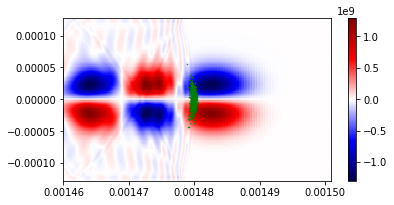

In [25]:
species = 'beam'
iteration = 3
field = 'Ex'

snapshot = './lab_frame_data/' + 'snapshot' + str(iteration).zfill(5)
header   = './lab_frame_data/Header'
allrd, info = read_raw_data.read_lab_snapshot(snapshot, header) # Read field data
F = allrd[field]
print( "Available info: ", *list(info.keys()) )
print("Available fields: ", info['field_names'])
nx = info['nx']
nz = info['nz']
x = info['x']
z = info['z']
xbo = get_particle_field(snapshot, species, 'x') # Read particle data
ybo = get_particle_field(snapshot, species, 'y')
zbo = get_particle_field(snapshot, species, 'z')
uzbo = get_particle_field(snapshot, species, 'uz')

plt.figure(figsize=(6, 3))
extent = np.array([info['zmin'], info['zmax'], info['xmin'], info['xmax']])
plt.imshow(F, aspect='auto', extent=extent, cmap='seismic')
plt.colorbar()
plt.plot(zbo, xbo, 'g.', markersize=1.)


## Read back-transformed data with hdf5 format (example: 3D run)

In [5]:
import h5py
import matplotlib.pyplot as plt

In [9]:
f = h5py.File('HDF5_lab_frame_data/snapshot00003', 'r')
print( list(f.keys())
# plt.figure()
# plt.imshow(f['Ey'][:,,:])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>